In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy.linalg
import time
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from numpy import linalg
from sklearn.metrics.pairwise import euclidean_distances
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
#from google.colab import files
#import io
from matplotlib.markers import MarkerStyle

## Dataset


In [2]:
 #Variable to choose_dataset = 0 to work with synthetic data and 1 to work with real dataset
 
 choose_dataset = 1


if choose_dataset == 0:
  print("You will be working with a synthetic dataset")
  #Create Data set with labels
  X, y = make_blobs(n_samples=10000, centers=2, n_features=2, random_state=1)
  y = [-1 if i==0 else 1 for i in y]

elif choose_dataset == 1:
  print("You will be working with a Real Dataset")

  #Import Data set of real Data
  url = "https://raw.githubusercontent.com/alecruces/HW-Optimizacion/main/riceClassification.csv"
  dataset = pd.read_csv(url)
  ##if frac = 
  df = dataset.sample(frac=0.1, random_state=1)

  X_var = df.drop(['Class'], axis=1)
  y_var = df[['Class']]
  X = X_var.to_numpy()
  y = y_var.to_numpy()
  shuffled = df.sample(frac=1)
  X = X[:,(5, 9)]
  y = [-1 if i==0 else 1 for i in y]

else:
  print("You have to choose between 0 or 1")

#Scale dataset
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)




You will be working with a Real Dataset


In [3]:
#Remove Labels
X_lab, X_unlab, y_lab, y_unlab = train_test_split(X,y, test_size=0.7, random_state=42)

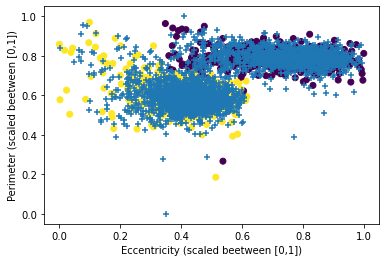

In [4]:
#Distribution of Labels and unlabels

if choose_dataset == 0:
  plt.scatter(X_lab[:, 0], X_lab[:, 1], marker='o',c = y_lab)
  plt.scatter(X_unlab[:, 0], X_unlab[:, 1], marker='+')
    
  plt.xlabel("X1 (scaled beetween [0,1])")
  plt.ylabel("X2 (scaled beetween [0,1])")
  #plt.savefig("blobs_lab_unlab.png")
  #files.download("blobs_lab_unlab.png")
  plt.show()

elif choose_dataset == 1:
  plt.scatter(X_lab[:, 0], X_lab[:, 1], marker='o',c = y_lab)
  plt.scatter(X_unlab[:, 0], X_unlab[:, 1], marker='+')
    
  plt.xlabel("Eccentricity (scaled beetween [0,1])")
  plt.ylabel("Perimeter (scaled beetween [0,1])")
  #plt.savefig("blobs_lab_unlab_rd.png")
  #files.download("blobs_lab_unlab_rd.png")
  plt.show()

else:
  print("No dataset to print")


## Defining Similarity Function: Euclidean Distance

In [5]:
#Similarity Function: RBF Kernel
#F is the scaling factor
def sim_dist(a, b, F):
    exp_euclid_dist = np.exp(-F*euclidean_distances(a, b)**2)
    return exp_euclid_dist


#Similarity Function: Euclidean distance
def sim_dist1(a, b):
    euclid_dist = np.zeros((len(a), len(b)))
    for i in range(len(a)):
        for j in range(len(b)):
            diff = a[i] - b[j]  
            euclid_dist[i][j]  = 1/(1+np.sqrt(np.dot (diff. T, diff) ))
            
    return euclid_dist


In [6]:
#This cell should be activated to graph the similarity functions
"""
def graf_dist(a, b, F):
    exp_euclid_dist = np.zeros((len(a) * len(b),2))
    z = 0
    
    for i in range(len(a)):
        for j in range(len(b)):
            for k in range(1):
                diff = a[i][k] - b[j][k] 
                exp_euclid_dist[z][0] = abs(diff)
                exp_euclid_dist[z][1] = np.exp(-F*(diff**2))
                z = z+1
                
    return exp_euclid_dist

def graf_dist2(a, b):
    euclid_dist = np.zeros((len(a) * len(b),2))
    z = 0
    
    for i in range(len(a)):
        for j in range(len(b)):
            for k in range(1):
                diff = a[i][k] - b[j][k] 
                euclid_dist[z][0] = abs(diff)
                euclid_dist[z][1] = 1/(1+np.sqrt(diff**2))
                z = z+1
                
    return euclid_dist
"""

'\ndef graf_dist(a, b, F):\n    exp_euclid_dist = np.zeros((len(a) * len(b),2))\n    z = 0\n    \n    for i in range(len(a)):\n        for j in range(len(b)):\n            for k in range(1):\n                diff = a[i][k] - b[j][k] \n                exp_euclid_dist[z][0] = abs(diff)\n                exp_euclid_dist[z][1] = np.exp(-F*(diff**2))\n                z = z+1\n                \n    return exp_euclid_dist\n\ndef graf_dist2(a, b):\n    euclid_dist = np.zeros((len(a) * len(b),2))\n    z = 0\n    \n    for i in range(len(a)):\n        for j in range(len(b)):\n            for k in range(1):\n                diff = a[i][k] - b[j][k] \n                euclid_dist[z][0] = abs(diff)\n                euclid_dist[z][1] = 1/(1+np.sqrt(diff**2))\n                z = z+1\n                \n    return euclid_dist\n'

In [7]:
#Scaling Factor
#Triangle inequality, choose the max euclidiean distance among features, and this will be set as the threshold for F

d1 = np.max(euclidean_distances(X_lab, X_unlab))
d2 = np.max(euclidean_distances(X_unlab, X_unlab))
dmax = max(d1,d2)
scaling_factor = -4*math.log(0.0001)/(dmax)

if choose_dataset == 0:
  scaling_factor = scaling_factor
else:
  scaling_factor = 30

print("Scaling Factor:", scaling_factor)


Scaling Factor: 30


In [8]:
## Graph RBF Kernel Similarity
"""
dist_graf = graf_dist(X, X, scaling_factor)
plot = plt.scatter(dist_graf[:, 0], dist_graf[:, 1])
plt.xlabel("Distance")
plt.ylabel("Similarity")

plt.savefig("exp_distance.png")
files.download("exp_distance.png") 
plt.show()
"""

'\ndist_graf = graf_dist(X, X, scaling_factor)\nplot = plt.scatter(dist_graf[:, 0], dist_graf[:, 1])\nplt.xlabel("Distance")\nplt.ylabel("Similarity")\n\nplt.savefig("exp_distance.png")\nfiles.download("exp_distance.png") \nplt.show()\n'

In [9]:
#Graph Euclidean Similarity Function
"""
dist_graf_lab_unlab = graf_dist2(X_lab, X_unlab)
plot = plt.scatter(dist_graf_lab_unlab[:, 0], dist_graf_lab_unlab[:, 1])

plt.xlabel("Distance")
plt.ylabel("Similarity")
plt.savefig("euclidean_distance.png")
files.download("euclidean_distance.png")
plt.show()
"""

'\ndist_graf_lab_unlab = graf_dist2(X_lab, X_unlab)\nplot = plt.scatter(dist_graf_lab_unlab[:, 0], dist_graf_lab_unlab[:, 1])\n\nplt.xlabel("Distance")\nplt.ylabel("Similarity")\nplt.savefig("euclidean_distance.png")\nfiles.download("euclidean_distance.png")\nplt.show()\n'

In [10]:
print("Calculating Weights label unlabel")
weights_lab_unlab = sim_dist(X_lab, X_unlab, scaling_factor)
print("Size Weights label unlabel ", weights_lab_unlab.shape)
print("Weights Label Unlabel",weights_lab_unlab)

Calculating Weights label unlabel
Size Weights label unlabel  (1091, 2546)
Weights Label Unlabel [[1.09880249e-02 9.70262406e-01 8.89690498e-01 ... 6.98303769e-01
  2.81433881e-03 5.57362112e-01]
 [9.72335207e-01 2.76518339e-02 3.60110829e-02 ... 3.35603835e-03
  3.25843961e-01 1.02708880e-02]
 [4.46854975e-05 2.39485816e-05 1.62619825e-06 ... 9.76075758e-08
  6.56345676e-03 3.15140803e-08]
 ...
 [8.93874920e-02 4.68508323e-01 2.50660609e-01 ... 6.99713497e-02
  1.07058125e-01 5.93102503e-02]
 [7.31690330e-03 6.07903376e-01 9.12466924e-01 ... 8.70518827e-01
  6.42698060e-04 9.52265130e-01]
 [6.29530403e-01 7.93005001e-02 1.33947275e-01 ... 2.13038016e-02
  9.85941519e-02 6.22344756e-02]]


In [11]:
print("Calculating Weights unlabel unlabel")
weights_unlab_unlab = sim_dist(X_unlab, X_unlab,scaling_factor)
print("Size Weights unlabel unlabel ", weights_unlab_unlab.shape)
print("Weights Unlabel Unlabel", weights_unlab_unlab)

Calculating Weights unlabel unlabel
Size Weights unlabel unlabel  (2546, 2546)
Weights Unlabel Unlabel [[1.00000000e+00 1.49705928e-02 1.91388587e-02 ... 1.47486685e-03
  3.79037752e-01 4.88142903e-03]
 [1.49705928e-02 1.00000000e+00 8.06286275e-01 ... 5.53112538e-01
  5.26633213e-03 4.23756404e-01]
 [1.91388587e-02 8.06286275e-01 1.00000000e+00 ... 7.24652839e-01
  2.78536693e-03 7.74163604e-01]
 ...
 [1.47486685e-03 5.53112538e-01 7.24652839e-01 ... 1.00000000e+00
  1.43642977e-04 8.13935300e-01]
 [3.79037752e-01 5.26633213e-03 2.78536693e-03 ... 1.43642977e-04
  1.00000000e+00 2.77399716e-04]
 [4.88142903e-03 4.23756404e-01 7.74163604e-01 ... 8.13935300e-01
  2.77399716e-04 1.00000000e+00]]


## Loss Function and Accuracy

In [12]:
#Loss function matrix
def loss_function(y, y_predict_unlabel):
        
    #first term: Label - Unlabel
    diff_y = np.power((np.array(y_predict_unlabel).reshape((-1,1)) - np.array(y).T), 2)
    loss_term1_matrix = diff_y * weights_lab_unlab.T
    loss_term1 = np.sum(loss_term1_matrix)
    
    #second term: Unlabel - Unlabel
    diff_y_unlab = np.power((np.array(y_predict_unlabel).reshape((-1,1)) - np.array(y_predict_unlabel).T), 2)
    loss_term2_matrix = diff_y_unlab * weights_unlab_unlab.T
    loss_term2 = np.sum(loss_term2_matrix)
    
    total_loss = loss_term1 + 0.5*loss_term2
    
    return total_loss

In [13]:
print("Loss of the real unlabeled output")
loss_function(y_lab, y_unlab)

Loss of the real unlabeled output


684200.1180409519

In [14]:
# Accuracy: How much far is from the wrong classification
#The max Loss is calculated as if all the yj are calssifies wrong. (Yj-yi)=2
loss_max = np.sum(weights_lab_unlab) * 4 + 0.5 * np.sum(weights_unlab_unlab) * 4

print("Max Loss:", loss_max)
def accuracy_function(y_predict_unlabel, loss):
    global loss_max
    accuracy = 1 - loss / loss_max
    return accuracy

def accuracy_function2(y_true, y_predict_unlabel):
    global y_unlab
    total = np.sum(np.abs(y_true-y_predict_unlabel))
    accuracy = 1 - 0.5 * (total / len(np.array(y_predict_unlabel)))
    return accuracy

Max Loss: 7354092.292543325


In [15]:
def predict(xx, threshold):
    x = xx.copy()
    for i in range(0, len(x)):
        if x[i] >= threshold:
            x[i] = 1
        elif x[i] <= -threshold:
            x[i] = -1
        else:
            x[i] = 0
    return np.array(x)

## Calculating Hessian Matrix

In [16]:
def hessian_matrix(X_u, weights_lab_unlab, weights_unlab_unlab):
    
    hessian = - 2 * weights_unlab_unlab
    
    for i in range(len(X_u)):
        hessian[i][i] = 0
    
    hessian += 2 * (np.diag(np.sum(weights_lab_unlab, axis=0).T + np.sum(weights_unlab_unlab, axis=0).T)-np.diag(np.diag(weights_unlab_unlab)))
    return hessian
    

In [17]:
def lipschitz_constant(hessian_matrix):
    eig_val, v = np.linalg.eig(hessian_matrix)
    condition_number = np.max(eig_val)
    return condition_number

def lipschitz_block(hessian):
    L = np.array([np.linalg.norm(hessian[:,i]) for i in range(len(hessian))], dtype='float64')
    L_i = np.repeat(L, len(hessian))
    return L_i

In [18]:
print("Calculate Hessian and Eigenvalues")

hessian = hessian_matrix(X_unlab, weights_lab_unlab, weights_unlab_unlab)
#print("Hessian Matrix", hessian)

L = lipschitz_constant(hessian)
print("Lipschitz constant", L)

Li = lipschitz_block(hessian)
print("Calculating Lipschitz constant for each Block Calculated")


Calculate Hessian and Eigenvalues
Lipschitz constant 3129.3314313524575
Calculating Lipschitz constant for each Block Calculated


## Hyperparameters:

We will define some hyperparameters that are common for all the methods as the error for early stopping and number of epochs. Also use a fixed stepsize, that as we show before, the Hessian matrix is positive semidefinite. We can use the Liptschitz constant to define our step size as alpha = 1/L

In [19]:
epsilon = 0.00001
epochs = 100000

#Defining the step with the Liptschitz constant
alpha_gd = 1/L

#Defining threshold for accuracy
threshold = 0.9

#Initialize y unlabeled vector
y_init = y_unlab_init = np.random.choice([-1, 1], size=(len(X_unlab))).astype('float64')

## Gradient Descent

In [20]:
#Defining terms of the Gradient

#Term that changes for each J but keep the same always
def grad_descent_lab(y, weights_lab_unlab):
    return np.matmul(np.array(y).T, weights_lab_unlab)

#Term that changes when unlabeles changes
def grad_descent_unlab(y_u, weights_unlab_unlab):
    return np.matmul(np.array(y_u).T, weights_unlab_unlab)

##this term of the gradient is a constant
coef1 = 2 * (np.sum(weights_lab_unlab, axis=0).T + np.sum(weights_unlab_unlab, axis=0).T)

#This term of the gradient is always the same
term2 = 2 * grad_descent_lab(y_lab, weights_lab_unlab)
    
def total_gradient(y_u):
    global coef1, term2,  weights_unlab_unlab
    term1 = coef1 * y_u
    term3 = 2 * grad_descent_unlab(y_u, weights_unlab_unlab)
        
    #Gradient Descent
    grad_descent = term1 - term2 - term3
        
    return grad_descent

In [21]:
#Defining terms of the Gradient for one index for the BCGD methods
#Defining incremental methods to update loss and grad

def grad_index(y_u, index):
    #coef1 and term2 where defined above
    global coef1, weights_unlab_unlab, term2
    term1 = y_u[index] * coef1[index] 
    term2_index = term2[index]
    term3 = 2 * np.sum(weights_unlab_unlab[:, index] * y_u)
    
    #Gradient Descent
    grad_index = term1 - term2_index - term3
    
    return grad_index

def loss_incremental(previous_loss, alpha_it, gradient_it, ind):
  global hessian
  gr2 = abs(gradient_it)**2
  term_2 = alpha_it*gr2
  term_3 = 0.5*(alpha_it**2)*(np.diag(hessian)[ind])*gr2
  new_loss = previous_loss - term_2 + term_3

  return new_loss

def grad_incremental(previous_grad, grad_it, alpha_it,ind):
  global hessian
  new_grad = previous_grad - alpha_it*grad_it*hessian[:,ind]
  return new_grad

In [ ]:
## Gradient Descent Method

#Initializing y unlabeled
y_unlab_init = np.copy(y_init)

#accu_grad_mat = [accuracy(y_unlab)]
loss_grad_gd = [loss_function(y_lab, y_unlab_init)]

acc_grad_gd = [accuracy_function(y_unlab_init, loss_grad_gd[0])]
acc_grad_gd2 = [accuracy_function2(y_unlab, y_unlab_init)]

#initial time in seconds
time_grad_gd = [0]
time0 = time.time() * 1000  

for i in range(epochs):

    #Gradient Descent
    grad_descent = total_gradient(y_unlab_init)
        
    #Updating y
    y_unlab_init = y_unlab_init - alpha_gd * grad_descent
    
    if epsilon >= np.linalg.norm(grad_descent):
        print("Stop by Total Gradient Stopping rule in iteration", i)
        break     

    #Calculate loss
    loss = loss_function(y_lab, y_unlab_init)
    loss_grad_gd.append(loss)

    #Calculate Accuracy measures
    acc_grad_gd.append(accuracy_function(y_unlab_init, loss))
    acc_grad_gd2.append(accuracy_function2(y_unlab, y_unlab_init))

    #Calculate cpu time
    time_grad_gd.append(time.time()*1000 - time0)
    
    #print(f" - final accuracy {(accuracies_gd[-1])*100:05.2f}% - loss {loss(y_labeled, y_unlabeled_gd):05.2f}")
    #print("Epoch",i,"Loss:", loss_function(y_lab, y_unlab_init))

iter_num_gd = i  
y_unlab_gd = np.copy(y_unlab_init)
print("Ending in iteration:", iter_num_gd, "out of ", epochs)
print("Total Loss:", loss)
print("Final time:", time_grad_gd[-1])
print("Accuracy based on Loss:", acc_grad_gd[-1])
print("Accuracy based on True labels:", acc_grad_gd2[-1])

In [ ]:
#Distribution of True and Predicted Unlabel"
y_unlab_gd_colors =['#FFD700' if i ==-1 else 'aqua' for i in predict(y_unlab_gd,0)]
y_unlab_colors =['darkorange' if i ==-1 else 'blue' for i in y_unlab]

plt.scatter(X_unlab[:, 0], X_unlab[:, 1], marker=MarkerStyle(marker = 'o'), c = y_unlab_colors)
plt.scatter(X_unlab[:, 0], X_unlab[:, 1], marker=MarkerStyle(marker = '+'),  c = y_unlab_gd_colors)

if choose_dataset  == 0:
  plt.xlabel("X1 (scaled beetween [0,1])")
  plt.ylabel("X2 (scaled beetween [0,1])")
  #plt.savefig("blobs_lab_unlab_pred.png")
  #files.download("blobs_lab_unlab_pred.png")
else:

  plt.xlabel("Eccentricity (scaled beetween [0,1])")
  plt.ylabel("Perimeter (scaled beetween [0,1])")
  #plt.savefig("blobs_lab_unlab_pred_rd.png")
  #files.download("blobs_lab_unlab_pred_rd.png")
plt.show()

## BCGD with randomized rule




In [ ]:
#1. With Total Gradient as a Stopping condition 
#Initializing y unlabeled
y_unlab_init_gd_bc_random_s = np.copy(y_init)

#vector with the random sample
index_vector = np.random.randint(0, len(X_unlab), epochs)

#Initializing Loss and Accuracy
loss_grad_gd_bc_s = [loss_function(y_lab, y_unlab_init_gd_bc_random_s)]
acc_grad_gd_bc_s = [accuracy_function(y_unlab_init_gd_bc_random_s, loss_grad_gd_bc_s[0])]
acc_grad_gd_bc2_s = [accuracy_function2(y_unlab, y_unlab_init_gd_bc_random_s)]
     
#Calculating Initial Gradient Descent
grad_total = total_gradient(y_unlab_init_gd_bc_random_s)
grad_gd_bc_s = []

#initial time in seconds
time_grad_gd_bc_s = [0]
time0 = time.time() * 1000

for i in range(epochs):
    
    index = index_vector[i]
    alpha = 1/Li[index]

    #Gradient of the block and updating y
    grad_it = grad_index(y_unlab_init_gd_bc_random_s, index)
    y_unlab_init_gd_bc_random_s[index] = y_unlab_init_gd_bc_random_s[index] - alpha  * 1 * grad_it
    
    #Calculate gradient incremental way
    grad_total = grad_incremental(grad_total, grad_it, alpha, index)
    
    #Stopping condition of the total gradient
    if epsilon >= np.linalg.norm(grad_total):
      print("Stop by Total Gradient Stopping rule in iteration", i)
      break

    #Stopping condition of the gradient multiply by the direction and by the number of variabes
    if epsilon >= (abs(grad_it*len(X_unlab))):
      print("Stop by Block Gradient Stopping rule in iteration", i)
      break

    #Calculate new loss
    loss_it = loss_incremental(loss_grad_gd_bc_s[i], alpha, grad_it, index)

    loss_grad_gd_bc_s.append(loss_it)

    #Calculate Accuracy
    acc_grad_gd_bc_s.append(accuracy_function(y_unlab_init_gd_bc_random_s, loss_it))
    acc_grad_gd_bc2_s.append(accuracy_function2(y_unlab, y_unlab_init_gd_bc_random_s))
    
     #Calculate cpu time
    time_grad_gd_bc_s.append(time.time()*1000 - time0)
    
    #print(f" - final accuracy {(accuracies_gd[-1])*100:05.2f}% - loss {loss(y_labeled, y_unlabeled_gd):05.2f}")
    #print("Epoch",i,"Loss:", loss_function(y_lab, y_unlab_init_gd_bc_random))

iter_num_gd_bc_s = i
print("Ending in iteration:", iter_num_gd_bc_s, "out of ", epochs)
print("Total Loss:", loss_it)
print("Final time:", time_grad_gd_bc_s[-1])
print("Accuracy based on Loss:", acc_grad_gd_bc_s[-1])
print("Accuracy based on True labels:", acc_grad_gd_bc2_s[-1])

## BCLG with GS rule

In [ ]:

#Initializing y unlabeled
y_unlab_init_gd_gs = np.copy(y_init)

#Initializing Loss and Accuracy
loss_grad_gd_gs = [loss_function(y_lab, y_unlab_init_gd_gs)]
acc_grad_gd_gs = [accuracy_function(y_unlab_init_gd_gs,loss_grad_gd_gs[0])]
acc_grad_gd_gs2 = [accuracy_function2(y_unlab, y_unlab_init_gd_gs)]
     
#Initializing Gradient Descent
grad_total = total_gradient(y_unlab_init_gd_gs)

#initial time in seconds
time_grad_gd_gs = [0]
time0 = time.time() * 1000

for i in range(epochs):
    
    #Calculating the index for which the gradient is max
    index = np.argmax(np.abs(grad_total))

    #Defining the step with the Liptschitz constant for each block
    alpha = 1/Li[index]

    #Gradient of the block and updating y
    grad_it = grad_index(y_unlab_init_gd_gs, index)
    grad_total = grad_incremental(grad_total, grad_it, alpha, index)

    y_unlab_init_gd_gs[index] = y_unlab_init_gd_gs[index] - alpha  * 1 * grad_it
    
    
    #Stopping condition of the total gradient
    if epsilon >= np.linalg.norm(grad_total):
      print("Stop by Total Gradient Stopping rulein iteration ", i)
      break
    
    #Calculate new loss
    loss_it = loss_incremental(loss_grad_gd_gs[i], alpha, grad_it, index)
        
    loss_grad_gd_gs.append(loss_it)

    #Calculate Accuracy
    acc_grad_gd_gs.append(accuracy_function(y_unlab_init_gd_gs, loss_it))
    acc_grad_gd_gs2.append(accuracy_function2(y_unlab, y_unlab_init_gd_gs))
    
     #Calculate cpu time
    time_grad_gd_gs.append(time.time()*1000 - time0)
    
    #print(f" - final accuracy {(accuracies_gd_gs[-1])*100:05.2f}% - loss {loss(y_labeled, y_unlabeled_gd_gs):05.2f}")
    #print("Epoch",i,"Loss:", loss_function(y_lab, y_unlab_init_gd_gs))

iter_num_gd_gs = i
print("Ending in iteration:", iter_num_gd_gs, "out of ", epochs)
print("Total Loss:", loss_it)
print("Final time:", time_grad_gd_gs[-1])
print("Accuracy based on Loss:", acc_grad_gd_gs[-1])
print("Accuracy based on True labels:", acc_grad_gd_gs2[-1])

## Graph
 In this section we graph the results.


In [ ]:
#Create iterations vector
iter_num_gd_ = list(range(0,len(loss_grad_gd)))
iter_num_gd_bc_s_ = list(range(0,len(loss_grad_gd_bc_s),1))
iter_num_gd_gs_ = list(range(0,len(loss_grad_gd_gs),1))

In [ ]:
#Graf Loss vs time
fig = plt.figure()
ax = plt.axes()

plt.plot(time_grad_gd, loss_grad_gd)
plt.plot(time_grad_gd_bc_s, loss_grad_gd_bc_s)
plt.plot(time_grad_gd_gs, loss_grad_gd_gs)

if choose_dataset == 0:

  ax.axvline(time_grad_gd[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd[-1]*1.01, loss_grad_gd[0]*0.5, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(time_grad_gd_bc_s[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_bc_s[-1]*0.99, loss_grad_gd[0]*0.3, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(time_grad_gd_gs[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_gs[-1]*1.01, loss_grad_gd[0]*0.5, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")

else:
  ax.axvline(time_grad_gd[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd[-1]*0.99, loss_grad_gd[0]*0.5, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(time_grad_gd_bc_s[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_bc_s[-1], loss_grad_gd[0]*0.3, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(time_grad_gd_gs[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_gs[-1], loss_grad_gd[0]*0.5, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")
  
#plt.xlim(0, 70000)

plt.xlabel("CPU time (ms)")
plt.ylabel("Loss Function")

plt.legend(
    [
        'Gradient Descent',
        'BCGD Randomized',
        "BCGD GS"
    ],
    loc="upper right"
)

plt.savefig("time_loss.jpg") 
plt.show()

In [ ]:
#Graf Loss vs iterations
fig = plt.figure()
ax = plt.axes()

plt.plot(iter_num_gd_, loss_grad_gd)
plt.plot(iter_num_gd_bc_s_, loss_grad_gd_bc_s)
plt.plot(iter_num_gd_gs_, loss_grad_gd_gs)

if choose_dataset == 0:
  ax.axvline(iter_num_gd_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_[-1]+2, loss_grad_gd[0]*0.9, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(iter_num_gd_bc_s_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_bc_s_[-1]*0.99, loss_grad_gd[0]*0.3, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(iter_num_gd_gs_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_gs_[-1]*1.01, loss_grad_gd[0]*0.5, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")

else:
  ax.axvline(iter_num_gd_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_[-1]+2, loss_grad_gd[0]*0.9, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(iter_num_gd_bc_s_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_bc_s_[-1]*0.99, loss_grad_gd[0]*0.3, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(iter_num_gd_gs_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_gs_[-1]*1.01, loss_grad_gd[0]*0.5, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")


plt.xlabel("Iteration number")
plt.ylabel("Loss Function")
plt.legend(
    [
        'Gradient Descent',
        'BCGD Randomized',
        "BCGD GS"
    ],
    loc="upper right"
)

plt.savefig("iter_loss.jpg")

plt.show()

In [ ]:
#Graf Accuracy based on Max Loss vs time
fig = plt.figure()
ax = plt.axes()

plt.plot(time_grad_gd, acc_grad_gd)
plt.plot(time_grad_gd_bc_s, acc_grad_gd_bc_s)
plt.plot(time_grad_gd_gs, acc_grad_gd_gs)

if choose_dataset == 0:
  ax.axvline(time_grad_gd[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd[-1]*1.01, 0.8, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(time_grad_gd_bc_s[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_bc_s[-1]*0.99, 0.9, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(time_grad_gd_gs[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_gs[-1]*1.01, 0.9, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")
else:
  ax.axvline(time_grad_gd[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd[-1]*0.99, 0.8, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(time_grad_gd_bc_s[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_bc_s[-1]*0.99, 0.8, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(time_grad_gd_gs[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_gs[-1]*0.9, 0.7, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")

plt.xlabel("CPU time (ms)")
plt.ylabel("Accuracy")
plt.legend(
    [
        'Gradient Descent',
        'BCGD Randomized',
        "BCGD GS"
    ],
    loc="lower right"
)

plt.savefig("time_accloss.jpg")
plt.show()

In [ ]:
#Graf Accuracy 
fig = plt.figure()
ax = plt.axes()

plt.plot(time_grad_gd, acc_grad_gd2)
plt.plot(time_grad_gd_bc_s, acc_grad_gd_bc2_s)
plt.plot(time_grad_gd_gs, acc_grad_gd_gs2)

if choose_dataset == 0:
  ax.axvline(time_grad_gd[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd[-1]*1.01, 0.8, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(time_grad_gd_bc_s[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_bc_s[-1]*0.99, 0.9, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(time_grad_gd_gs[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_gs[-1]*1.01, 0.9, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="right")
else:
  ax.axvline(time_grad_gd[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd[-1]*0.99, 0.65, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(time_grad_gd_bc_s[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_bc_s[-1]*1.01, 0.65, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(time_grad_gd_gs[-1], color="grey", ls="dotted")
  ax.text(time_grad_gd_gs[-1]*1.01, 0.6, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")
plt.xlim(0, 70000)
plt.xlabel("CPU time (ms)")
plt.ylabel("Accuracy")

plt.legend(
    [
        'Gradient Descent',
        'BCGD Randomized',
        "BCGD GS"
    ],
    loc="lower right"
)

plt.savefig("time_acc1.jpg")
plt.show()

In [ ]:
#Graf Loss vs iterations
fig = plt.figure()
ax = plt.axes()

plt.plot(iter_num_gd_, acc_grad_gd)
plt.plot(iter_num_gd_bc_s_, acc_grad_gd_bc_s)
plt.plot(iter_num_gd_gs_, acc_grad_gd_gs)

if choose_dataset == 0:
  ax.axvline(iter_num_gd_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_[-1]+2, 0.6, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(iter_num_gd_bc_s_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_bc_s_[-1]*0.99, 0.9, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(iter_num_gd_gs_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_gs_[-1]*1.01, 0.9, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")

else:
  ax.axvline(iter_num_gd_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_[-1]*1.01, 0.7, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(iter_num_gd_bc_s_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_bc_s_[-1]*0.99, 0.7, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(iter_num_gd_gs_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_gs_[-1]*1.01, 0.7, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")

plt.xlabel("Iteration number")
plt.ylabel("Accuracy")
plt.legend(
    [
        'Gradient Descent',
        'BCGD Randomized',
        "BCGD GS"
    ],
    loc="upper right"
)

plt.savefig("iter_accloss.jpg")
plt.show()

In [ ]:
#Graf Loss vs iterations
fig = plt.figure()
ax = plt.axes()

plt.plot(iter_num_gd_, acc_grad_gd2)
plt.plot(iter_num_gd_bc_s_, acc_grad_gd_bc2_s)
plt.plot(iter_num_gd_gs_, acc_grad_gd_gs2)

if choose_dataset == 0:
  ax.axvline(iter_num_gd_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_[-1]+2, 0.55, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(iter_num_gd_bc_s_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_bc_s_[-1]*0.99, 0.8, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(iter_num_gd_gs_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_gs_[-1]*1.01, 0.9, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")

else: 
  ax.axvline(iter_num_gd_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_[-1]*1.01, 0.55, "Gradient \n Descent", 
          fontsize=8, fontweight=50, color="grey", ha="left")

  ax.axvline(iter_num_gd_bc_s_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_bc_s_[-1]*0.99, 0.65, "BCGD \n Randomized",
          fontsize=8, fontweight=50, color="grey", ha="right")

  ax.axvline(iter_num_gd_gs_[-1], color="grey", ls="dotted")
  ax.text(iter_num_gd_gs_[-1]*1.01, 0.65, "BCGD \n GS", 
          fontsize=8, fontweight=50, color="grey", ha="left")

plt.xlabel("Iteration number")
plt.ylabel("Accuracy")
plt.legend(
    [
        'Gradient Descent',
        'BCGD Randomized',
        "BCGD GS"
    ],
    loc="upper right"
)

plt.savefig("iter_acc.jpg") 
plt.show()